# Scoring Matrices
## generic score matrices

Score matrices have the general form:



$$
\begin{bmatrix}
    S(a_1, a_1)       & S(a_2, a_1) &  \dots & S(a_n, a_1) \\
    S(a_1, a_2)       & S(a_2, a_2) &  \dots & S(a_n, a_2) \\
    \vdots{} \\
    S(a_1, a_n)       & S(a_2, a_n) &  \dots & S(a_n, a_n)
\end{bmatrix}
$$

Where $a$ is set of elements/letters/bases that receive a score according to how a particular one is substituted.
We then have a scoring function $S(a_i, b_i)$ which outputs a single value according to its inputs, two elements to be compared.
For example, consider the language analogy, comparing the two words: 

biologi
biology

Presupposing these two words are related and that we want to find the best alignment - i.e. the one which tells us which individual letters correspond to which. We might for example, want to penalize the substitution of vowels less than consonants, as linguistic studies have shown that vowels are some of the most change-prone letters of alphabets. 
b
g
i
l
o
y



## identity-score matrix
Let's build the simplest type of score matrix

$$
\begin{bmatrix}
    b       & 1    \\
    g       & 0 &  1    \\
    i       & 0 &  0 & 1  \\
    l       & 0 &  0 & 0 & 1  \\
    o       & 0 &  0 & 0 & 0 & 1  \\ 
    y       & 0 &  0 & 0 & 0 & 0 & 1   \\
            & b &  g & i & l & o & y   
\end{bmatrix}
$$

## now let's add a penalty for consant-related mismatches
$$
\begin{bmatrix}
    b       & 1    \\
    g       & -1 &  1    \\
    i       & -1 &  -1 & 1  \\
    l       & -1 &  -1 & -1 & 1  \\
    o       & -1 &  -1 & 0  & -1 & 1  \\ 
    y       & -1 &  -1 & 0  & -1 & 0 & 1   \\
            & b  &  g  & i  & l  & o & y   
\end{bmatrix}
$$

##Now try scoring some different alignments.
For simplicity, we'll just score those regions that have a corresponding base to compare to rather than considering gaps.
So an example alignment is:
--biology
biologi--
score = S(b,o) + S(i,l) + S(o,o) + S(l,g) + S(o,i) = -1 + -1 + 1 + -1 + 0 = -2

biology
biologi
score = S(b,b) + S(i,i) + S(o,o) + S(l,l) + S(o,o) + S(g,g) + S (y,i) = 6

Note that maximum possible score with our matrix is 7.

If we were to go deeper with the linguistic analogy, we might consider penalizing a y -> i substition less than a o -> i substitution. The underlying principle behind our intuition is our degree of "surprise" or expectation due to our knowledge of the statistical distribution of letters in English and Swedish. The same principle can be applied to biological strings, as some substitutions are more common than others. Let's build the classic PAM matrix for amino acid substition now.
Taken from Zvelebil/Baum, 2008

In [99]:
%matplotlib inline


def compare_pam120(string1,string2):
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn
    seaborn.set()
    aa_index = {'c': 0, 's': 1, 't': 2, 'p': 3, 'a': 4, 'g': 5, 'n': 6, 'd': 7
               , 'e': 8, 'q': 9, 'h': 10, 'r': 11, 'k': 12, 'm': 13, 'i': 14, 'l': 15
               , 'v': 16, 'f': 17, 'y': 18, 'w': 19}
    PAM120 = np.array([ [9]
                       ,[-1, 3]
                       ,[-3, 2, 4]

                       ,[-3, 1,-1, 6]
                       ,[-3, 1, 1, 1, 3]
                       ,[-5, 1,-1,-2, 1, 5]

                       ,[-5, 1, 0,-2, 0, 0, 4]                   
                       ,[-7, 0,-1,-2, 0, 0, 2, 5]
                       ,[-7,-1,-2,-1, 0,-1, 1, 3, 5]
                       ,[-7,-2,-2, 0,-1,-3, 0, 1, 2, 6]

                       ,[-4,-2,-3,-1,-3,-4, 2, 0,-1, 3, 7]
                       ,[-4,-1,-2,-1,-3,-4,-1,-3,-3, 1, 1, 6]
                       ,[-7,-1,-1,-2,-2,-3, 1,-1,-1, 0,-2, 2, 5]

                       ,[-6,-2,-1,-3,-2,-4,-3,-4,-4,-1,-4,-1, 0, 8]
                       ,[-3,-2, 0,-3,-1,-4,-2,-3,-3,-3,-4,-2,-2, 1, 6]                   
                       ,[-7,-4,-3,-3,-3,-5,-4,-5,-4,-2,-3,-4,-4, 3, 1, 5]
                       ,[-2,-2, 0,-2, 0,-2,-3,-3,-3,-3,-3,-3,-4, 1, 3, 1, 5]

                       ,[-6,-3,-4,-5,-4,-5,-4,-7,-6,-6,-2,-4,-6,-1, 0, 0,-3, 8]
                       ,[-1,-3,-3,-6,-4,-6,-2,-5,-4,-5,-1,-6,-6,-4,-2,-3,-3, 4, 8]
                       ,[-8,-2,-6,-7,-7,-8,-5,-8,-8,-6,-5, 1,-5,-7,-7,-5,-8,-1,-1,12]])
    #string1 = 'ccsscctpagndehrvlywdeqh'
    #string2 = 'ccsscctpagndehrvlywdeqg'
    #string2 = 'ccscsstpagnedhrvelydeqh'
    score = 0
    visual = np.zeros((1,len(string1)))
    for i in range(0,len(string1)):
            previous_score = score
            if aa_index[string1[i]] > aa_index[string2[i]]:
                score += int(PAM120[int(aa_index[string1[i]])][int(aa_index[string2[i]])])
            else:
                score += int(PAM120[int(aa_index[string2[i]])][int(aa_index[string1[i]])])
            print score-previous_score, score, aa_index[string1[i]], aa_index[string2[i]], i, j, string1[i], string1[i]
            visual[0,i] = score-previous_score
    print "final score: ", score
    plt.imshow(visual,cmap="seismic_r",vmin=int(np.min(np.min(PAM120))), vmax=int(np.max(np.max(PAM120))))
    return score

9 9 0 0 0 g c c
9 18 0 0 1 g c c
3 21 1 1 2 g s s
3 24 1 1 3 g s s
9 33 0 0 4 g c c
9 42 0 0 5 g c c
4 46 2 2 6 g t t
6 52 3 3 7 g p p
3 55 4 4 8 g a a
5 60 5 5 9 g g g
4 64 6 6 10 g n n
5 69 7 7 11 g d d
5 74 8 8 12 g e e
7 81 10 10 13 g h h
6 87 11 11 14 g r r
5 92 16 16 15 g v v
5 97 15 15 16 g l l
8 105 18 18 17 g y y
12 117 19 19 18 g w w
5 122 7 7 19 g d d
5 127 8 8 20 g e e
6 133 9 9 21 g q q
7 140 10 10 22 g h h
final score:  140


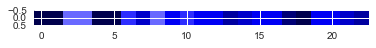

In [100]:
example1 = 'ccsscctpagndehrvlywdeqh'
perfect_match = compare_pam120(example1, example1)

9 9 0 0 0 g c c
9 18 0 0 1 g c c
3 21 1 1 2 g s s
3 24 1 1 3 g s s
9 33 0 0 4 g c c
9 42 0 0 5 g c c
4 46 2 2 6 g t t
6 52 3 3 7 g p p
3 55 4 4 8 g a a
5 60 5 5 9 g g g
0 60 6 4 10 g n n
5 65 7 7 11 g d d
5 70 8 8 12 g e e
7 77 10 10 13 g h h
-3 74 11 4 14 g r r
5 79 16 16 15 g v v
5 84 15 15 16 g l l
8 92 18 18 17 g y y
-7 85 19 4 18 g w w
5 90 7 7 19 g d d
5 95 8 8 20 g e e
-1 94 9 4 21 g q q
7 101 10 10 22 g h h
final score:  101


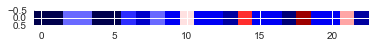

In [101]:
example2 = 'ccsscctpagadehavlyadeah'
a_few_substitutions = compare_pam120(example1, example2)